# **Loading Saved Data_Clean file**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Mount Google Drive to access your files
from google.colab import drive
drive.mount('/content/drive')

# Define the path to your cleaned dataset
path = "/content/drive/MyDrive/flights_cleaned.csv"

# Load the cleaned dataset into a DataFrame
df_clean = pd.read_csv(path, parse_dates=["FL_DATE"])

print("✅ Cleaned dataset reloaded successfully!")
print("DataFrame Info:")
df_clean.info()

print("\nDataFrame Head:")
df_clean.head(3)

Mounted at /content/drive
✅ Cleaned dataset reloaded successfully!
DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000000 entries, 0 to 2999999
Data columns (total 30 columns):
 #   Column             Dtype         
---  ------             -----         
 0   FL_DATE            datetime64[ns]
 1   AIRLINE            object        
 2   FL_NUMBER          int64         
 3   ORIGIN             object        
 4   ORIGIN_CITY        object        
 5   DEST               object        
 6   DEST_CITY          object        
 7   DISTANCE           float64       
 8   CRS_DEP_TIME       object        
 9   DEP_TIME           object        
 10  DEP_DELAY          float64       
 11  CRS_ARR_TIME       object        
 12  ARR_TIME           object        
 13  ARR_DELAY          float64       
 14  CRS_ELAPSED_TIME   float64       
 15  ELAPSED_TIME       float64       
 16  AIR_TIME           float64       
 17  CANCELLED          float64       
 18  CANCELLATION_CODE  

,FL_DATE,AIRLINE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,DISTANCE,CRS_DEP_TIME,DEP_TIME,...,Year,Month,WeekdayName,DepHour,Route,CityPair,SCHED_BLOCK_MIN,ACT_BLOCK_MIN,delay_reason,delay_time
0,2019-01-09,United Air Lines Inc.,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",1065.0,11:55 AM,11:51 AM,...,2019,1,Wednesday,11,FLL → EWR,"Fort Lauderdale, FL → Newark, NJ",186.0,176.0,No Delay,0.0
1,2022-11-19,Delta Air Lines Inc.,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",1399.0,09:20 PM,09:14 PM,...,2022,11,Saturday,21,MSP → SEA,"Minneapolis, MN → Seattle, WA",235.0,236.0,No Delay,0.0
2,2022-07-22,United Air Lines Inc.,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",680.0,09:54 AM,10:00 AM,...,2022,7,Friday,9,DEN → MSP,"Denver, CO → Minneapolis, MN",118.0,112.0,No Delay,0.0


# **Delay Heatmap**

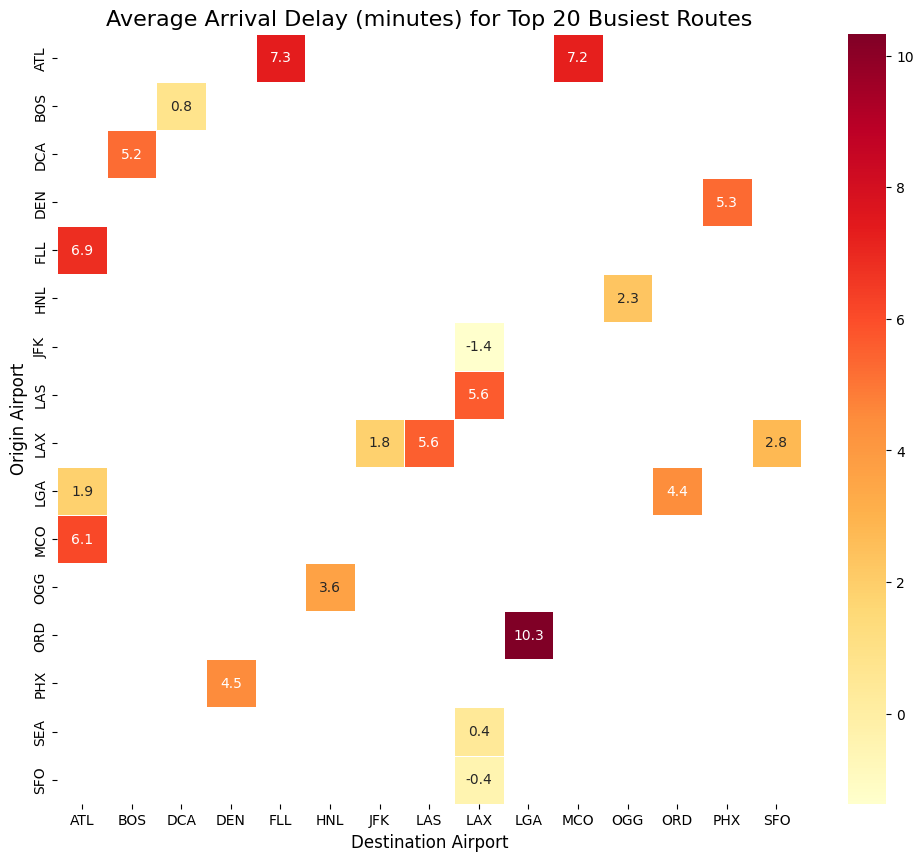

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming your df_clean DataFrame is already loaded

# Find the top 20 busiest routes to focus the heatmap
top_20_routes = df_clean['Route'].value_counts().head(20).index

# Filter the data to include only the top 20 routes
df_top_20 = df_clean[df_clean['Route'].isin(top_20_routes)].copy()

# Calculate the average arrival delay for each origin-destination pair
delay_matrix = df_top_20.pivot_table(index='ORIGIN', columns='DEST', values='ARR_DELAY', aggfunc='mean')

# Create the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(delay_matrix, cmap='YlOrRd', annot=True, fmt=".1f", linewidths=.5)
plt.title('Average Arrival Delay (minutes) for Top 20 Busiest Routes', fontsize=16)
plt.xlabel('Destination Airport', fontsize=12)
plt.ylabel('Origin Airport', fontsize=12)
plt.show()

# *Maps and Routes*

**The average delay is shown in a pop-up when you click an airport marker, not as a separate visual element on the map itself.**

Top 10 Busiest Routes (by Flight Count):
Route
SFO → LAX    5358
LAX → SFO    5212
LGA → ORD    4735
OGG → HNL    4656
ORD → LGA    4634
LAX → LAS    4627
HNL → OGG    4554
LAS → LAX    4550
LAX → JFK    4403
JFK → LAX    4305
Name: count, dtype: int64


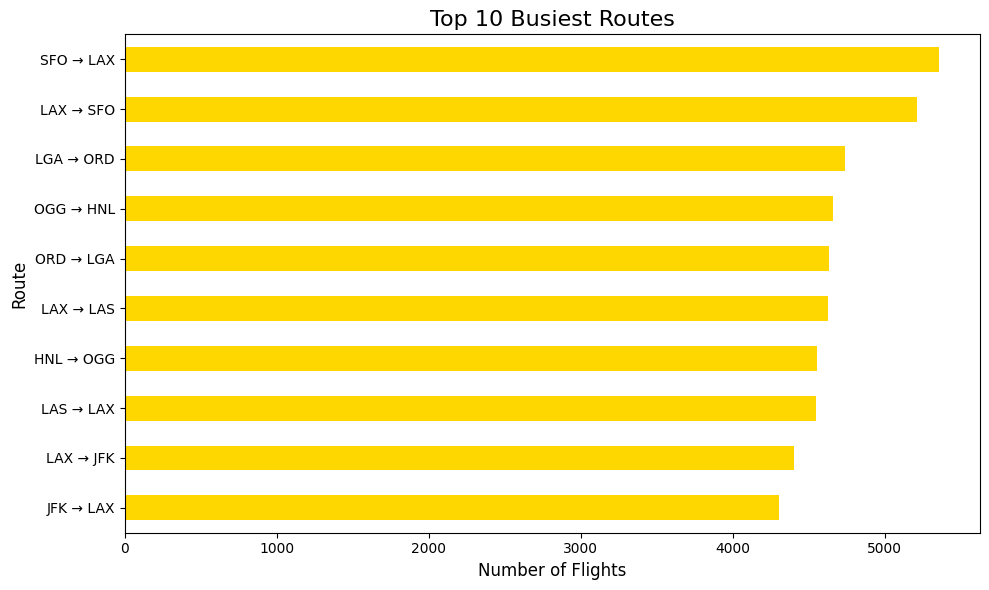


✅ Map showing busiest airports created successfully!


In [ ]:
import pandas as pd
import numpy as np
import folium
import matplotlib.pyplot as plt

# Assuming your df_clean DataFrame is already loaded

# --- Part 1: Busiest Routes Bar Chart (This is your "Top 10 origin-destination pairs") ---
print("Top 10 Busiest Routes (by Flight Count):")
top_routes = df_clean['Route'].value_counts().head(10)
print(top_routes)

plt.figure(figsize=(10, 6))
top_routes.plot(kind='barh', color='gold')
plt.title('Top 10 Busiest Routes', fontsize=16)
plt.xlabel('Number of Flights', fontsize=12)
plt.ylabel('Route', fontsize=12)
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

# --- Part 2: Maps Showing Busiest Airports ---
# We need to find the location (lat/lon) of the airports
# Since this data is not in your current DataFrame, we will use a sample.
# In a real-world scenario, you would merge this data from another source.
airport_locations = {
    'ATL': (33.6407, -84.4277), 'DFW': (32.8998, -97.0403), 'ORD': (41.9742, -87.9073),
    'DEN': (39.8561, -104.6737), 'CLT': (35.2139, -80.9431), 'LAX': (33.9416, -118.4085),
    'PHX': (33.4342, -112.0119), 'LAS': (36.0840, -115.1537), 'SEA': (47.4480, -122.3088),
    'MCO': (28.4294, -81.3089), 'SFO': (37.6213, -122.3790), 'JFK': (40.6413, -73.7781)
}

# Find the top 10 busiest airports
busiest_airports = df_clean['ORIGIN'].value_counts().head(10).index
avg_delays = df_clean.groupby('ORIGIN')['ARR_DELAY'].mean()

# Create a base map
us_map = folium.Map(location=[39.8283, -98.5795], zoom_start=4)

# Add circles for each of the busiest airports
for airport_code in busiest_airports:
    if airport_code in airport_locations:
        lat, lon = airport_locations[airport_code]
        delay = avg_delays.get(airport_code, 0)

        folium.CircleMarker(
            location=[lat, lon],
            radius=np.sqrt(top_routes.get(airport_code, 0) / 1000),  # Scale radius by flight count
            color='blue',
            fill=True,
            fill_color='blue',
            fill_opacity=0.6,
            popup=f"{airport_code}: {top_routes.get(airport_code, 0)} Flights, Avg Delay: {delay:.2f} min"
        ).add_to(us_map)

# Display the map
print("\n✅ Map showing busiest airports created successfully!")
us_map

**week 6 graphs**

# *Monthly Cancellation Rate*

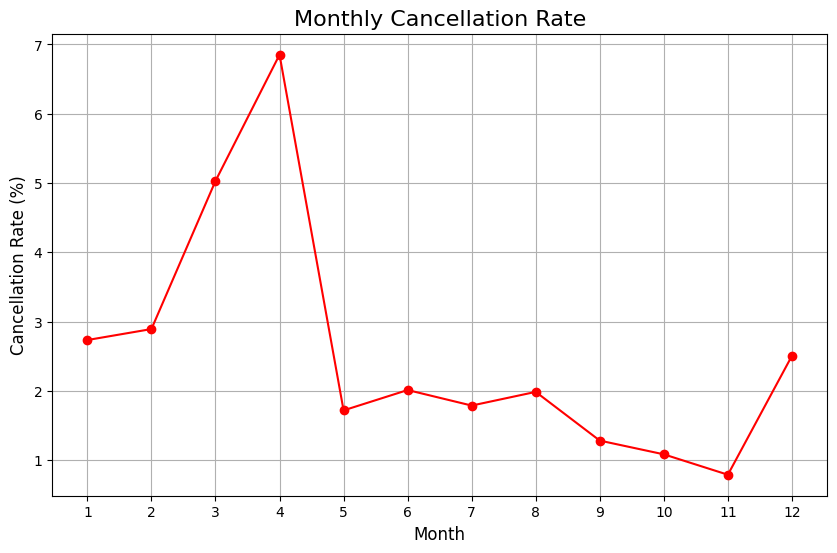

✅ Monthly cancellation rate line plot created successfully!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming df_clean is already loaded and ready from Milestone 1

# Analyze monthly cancellation trends
monthly_cancellations = df_clean.groupby('Month')['CANCELLED'].sum()
monthly_total_flights = df_clean.groupby('Month')['FL_NUMBER'].count()
monthly_cancel_rate = (monthly_cancellations / monthly_total_flights) * 100

# Plot monthly cancellation rate
plt.figure(figsize=(10, 6))
monthly_cancel_rate.plot(kind='line', marker='o', color='red')
plt.title('Monthly Cancellation Rate', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Cancellation Rate (%)', fontsize=12)
plt.xticks(np.arange(1, 13, 1))
plt.grid(True)
plt.show()

print("✅ Monthly cancellation rate line plot created successfully!")

***Percentage Breakdown of Cancellation Reasons***

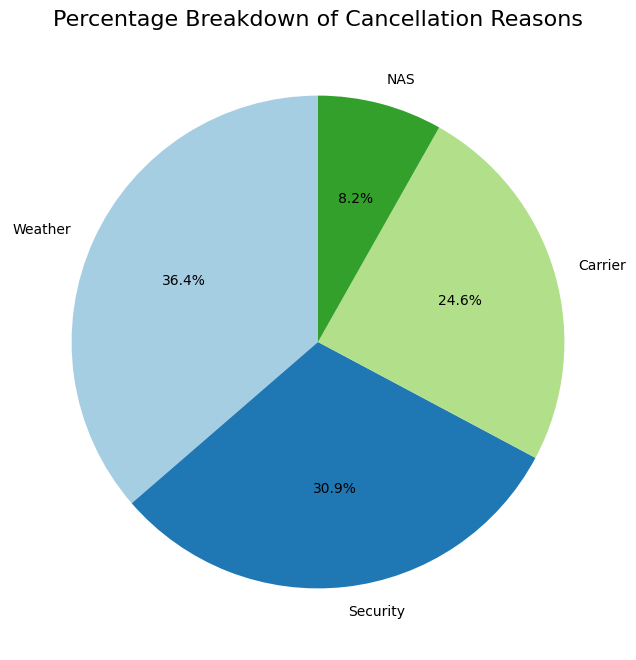

✅ Cancellation reason pie chart created successfully!


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df_clean DataFrame is already loaded

# Define a dictionary to map the cancellation codes to their meanings
cancellation_codes_map = {
    'A': 'Carrier',
    'B': 'Weather',
    'C': 'NAS',
    'D': 'Security'
}

# Filter for only cancelled flights
cancelled_flights = df_clean[df_clean['CANCELLED'] == 1].copy()

# Map the cancellation codes to the descriptive names
cancelled_flights['CANCELLATION_CODE'] = cancelled_flights['CANCELLATION_CODE'].map(cancellation_codes_map)

# Count the number of flights for each new cancellation reason
cancellation_counts = cancelled_flights['CANCELLATION_CODE'].value_counts()

# Plot the pie chart
plt.figure(figsize=(10, 8))
plt.pie(cancellation_counts, labels=cancellation_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage Breakdown of Cancellation Reasons', fontsize=16)
plt.show()

print("✅ Cancellation reason pie chart created successfully!")

# **Impact of Holidays/Winter Months**

/tmp/ipython-input-1262910793.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=monthly_flights.index, y=monthly_flights.values,


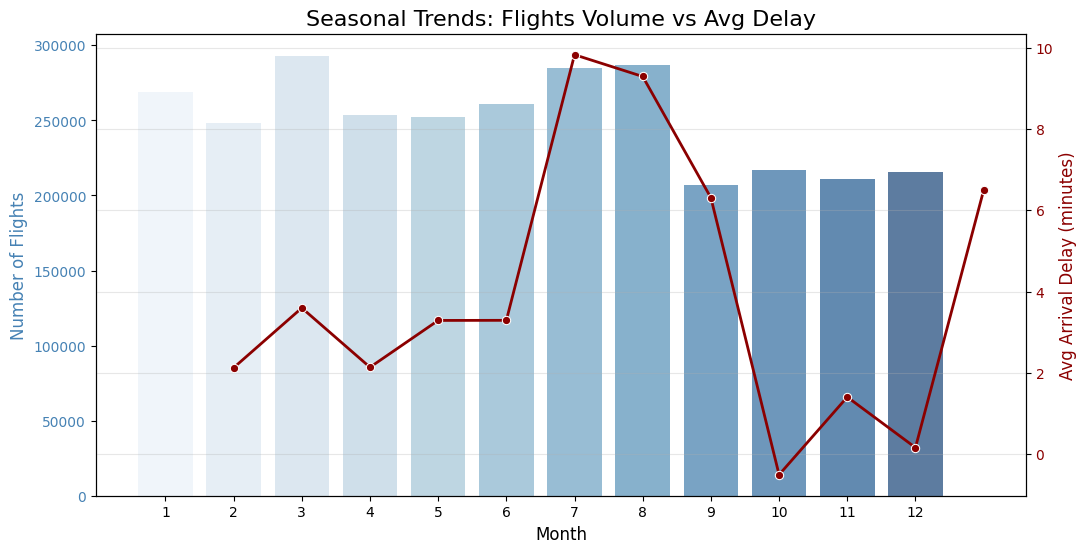

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Data prep ---
monthly_avg_delay = df_clean.groupby('Month')['ARR_DELAY'].mean()
monthly_flights = df_clean.groupby('Month').size()

# --- Plot ---
fig, ax1 = plt.subplots(figsize=(12,6))

# Flights (bar, left axis)
sns.barplot(x=monthly_flights.index, y=monthly_flights.values,
            palette='Blues', alpha=0.7, ax=ax1)
ax1.set_xlabel("Month", fontsize=12)
ax1.set_ylabel("Number of Flights", color="steelblue", fontsize=12)
ax1.tick_params(axis="y", labelcolor="steelblue")

# Average delays (line, right axis)
ax2 = ax1.twinx()
sns.lineplot(x=monthly_avg_delay.index, y=monthly_avg_delay.values,
             marker="o", color="darkred", linewidth=2, ax=ax2)
ax2.set_ylabel("Avg Arrival Delay (minutes)", color="darkred", fontsize=12)
ax2.tick_params(axis="y", labelcolor="darkred")

# Title
plt.title("Seasonal Trends: Flights Volume vs Avg Delay", fontsize=16)
plt.grid(True, alpha=0.3)

plt.show()


/tmp/ipython-input-2789261062.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=holiday_cancel_rate, x="HolidayFlag", y="CancelRate", palette="Blues")


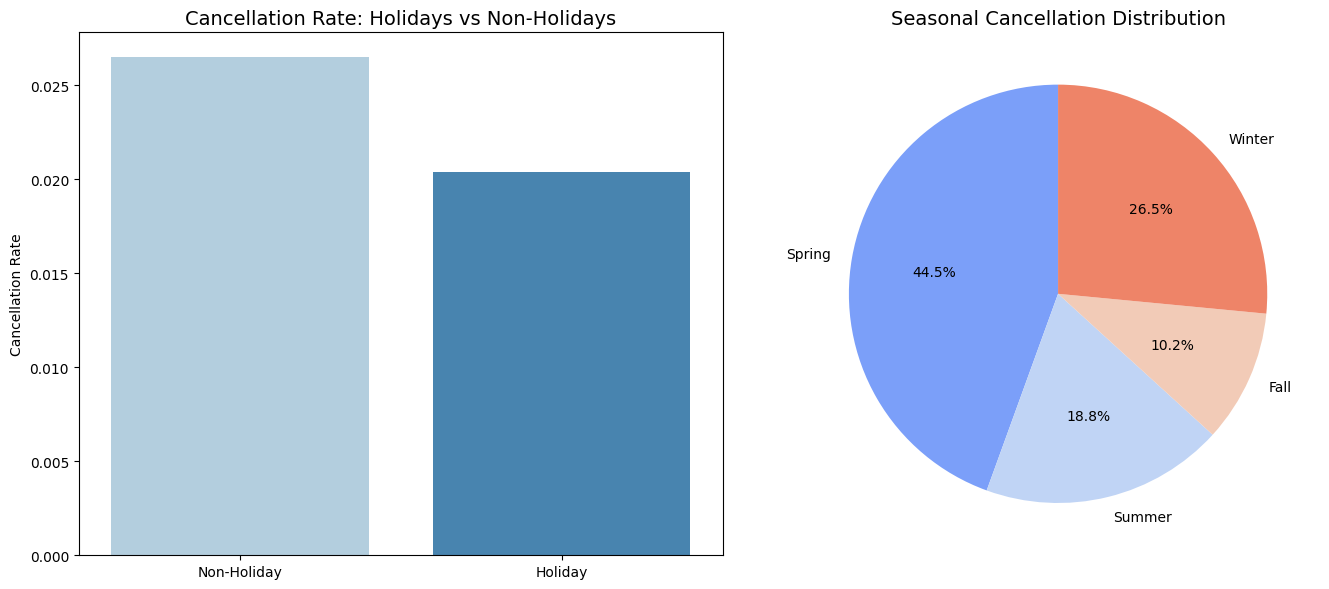

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Define holiday dates (MM-DD) ---
holidays = ["01-01","07-04","12-25","11-25","11-26","11-27","11-28","11-29"]

# Temporary holiday flag (no new column saved)
is_holiday = df_clean["FL_DATE"].dt.strftime("%m-%d").isin(holidays)

# --- Step 2: Holiday cancellation rates ---
holiday_cancel_rate = (
    df_clean.groupby(is_holiday)["CANCELLED"]
    .mean()
    .reset_index()
    .rename(columns={"CANCELLED":"CancelRate"})
)
holiday_cancel_rate["HolidayFlag"] = holiday_cancel_rate[is_holiday.name].map({False:"Non-Holiday", True:"Holiday"})

# --- Step 3: Seasonal cancellation rates ---
season_cancel_rate = (
    df_clean.groupby("Season")["CANCELLED"]
    .mean()
    .reindex(["Spring","Summer","Fall","Winter"])
)

# --- Step 4: Plot graphs ---
plt.figure(figsize=(14,6))

# Holiday impact (Bar)
plt.subplot(1,2,1)
sns.barplot(data=holiday_cancel_rate, x="HolidayFlag", y="CancelRate", palette="Blues")
plt.title("Cancellation Rate: Holidays vs Non-Holidays", fontsize=14)
plt.ylabel("Cancellation Rate")
plt.xlabel("")

# Season impact (Pie)
plt.subplot(1,2,2)
plt.pie(season_cancel_rate.values, labels=season_cancel_rate.index, autopct='%1.1f%%',
        startangle=90, colors=sns.color_palette("coolwarm", 4))
plt.title("Seasonal Cancellation Distribution", fontsize=14)

plt.tight_layout()
plt.show()
